In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/vgsales.csv')


In [132]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [133]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [134]:
df.dropna(inplace=True)

In [135]:
df.drop_duplicates(inplace=True)

In [136]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [137]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


<Figure size 3200x3200 with 0 Axes>

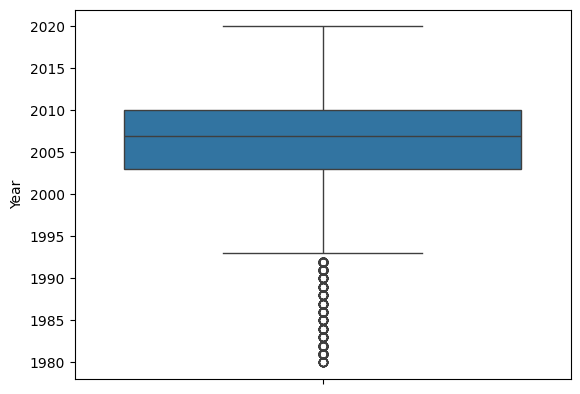

<Figure size 3200x3200 with 0 Axes>

In [112]:
sns.boxplot(df['Year'])
plt.figure(figsize = (32,32))

In [144]:

columns = ['Year', 'Rank', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[
    (df[columns] < lower_bound) | (df[columns] > upper_bound)
].any(axis=1)

df_cleaned = df[~outliers]


In [148]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11675 entries, 2206 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          11675 non-null  int64  
 1   Name          11675 non-null  object 
 2   Platform      11675 non-null  object 
 3   Year          11675 non-null  float64
 4   Genre         11675 non-null  object 
 5   Publisher     11675 non-null  object 
 6   NA_Sales      11675 non-null  float64
 7   EU_Sales      11675 non-null  float64
 8   JP_Sales      11675 non-null  float64
 9   Other_Sales   11675 non-null  float64
 10  Global_Sales  11675 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


In [157]:
df_cleaned.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000
mean,10245.086767,2007.132677,0.099587,0.041713,0.010488,0.013225,0.165411
std,3914.537017,4.804268,0.119333,0.059055,0.022323,0.018542,0.167292
min,2208.000000,1993.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,6956.500000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.040000
50%,10627.000000,2008.000000,0.060000,0.020000,0.000000,0.010000,0.100000
75%,13605.500000,2010.000000,0.140000,0.060000,0.010000,0.020000,0.230000
max,16600.000000,2020.000000,0.600000,0.270000,0.100000,0.100000,0.940000


In [160]:
df_cleaned.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


<Axes: ylabel='count'>

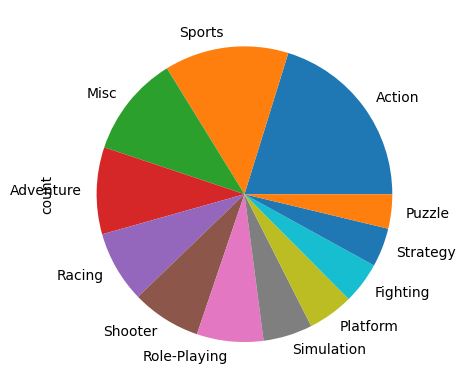

In [203]:
df_cleaned['Genre'].value_counts().plot(kind='pie')

<Axes: xlabel='Rank', ylabel='NA_Sales'>

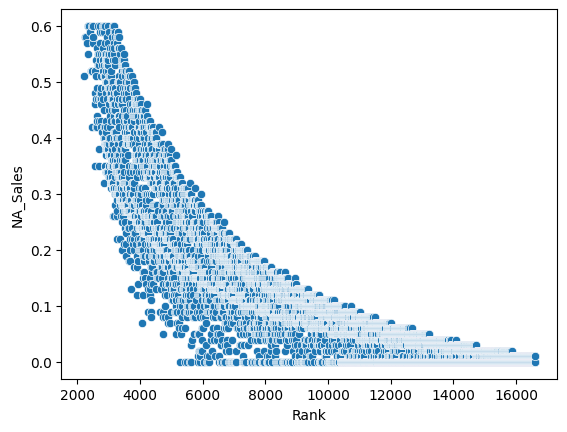

In [164]:
sns.scatterplot(x=df_cleaned['Rank'],y=df_cleaned['NA_Sales'])

<Axes: xlabel='Rank', ylabel='JP_Sales'>

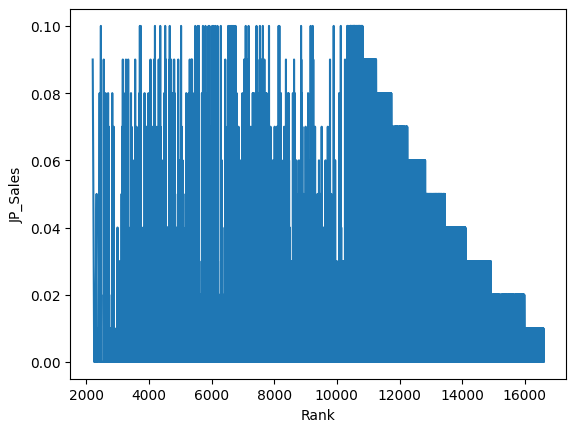

In [168]:
sns.lineplot(x=df_cleaned['Rank'],y=df_cleaned['JP_Sales'])

<Axes: xlabel='Rank', ylabel='EU_Sales'>

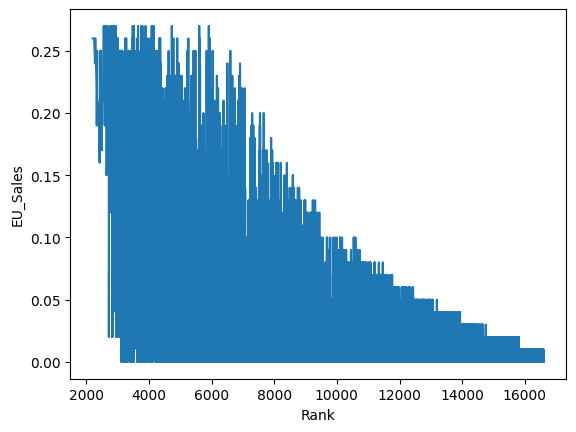

In [170]:
sns.lineplot(x=df_cleaned['Rank'],y=df_cleaned['EU_Sales'])

<Axes: xlabel='Rank', ylabel='Global_Sales'>

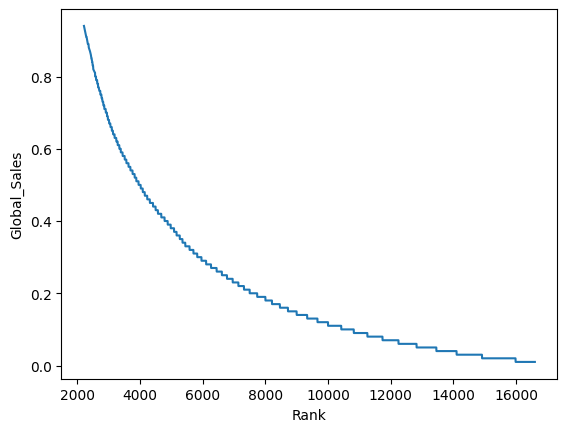

In [171]:
sns.lineplot(x=df_cleaned['Rank'],y=df_cleaned['Global_Sales'])

<ipython-input-185-ddcffcc663d4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="NA_Sales", y="Genre", data=df_cleaned, palette="Blues")  # Use horizontal barplot


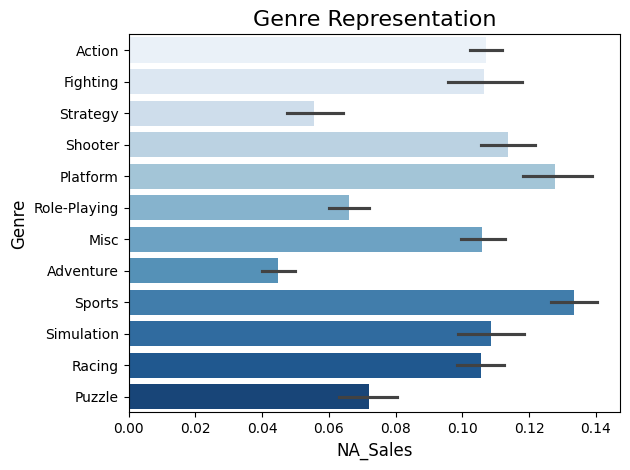

In [185]:
  # Set figure size
sns.barplot(x="NA_Sales", y="Genre", data=df_cleaned, palette="Blues")  # Use horizontal barplot
plt.title("Genre Representation", fontsize=16)
plt.xlabel("NA_Sales", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

<ipython-input-187-45065a905df5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="EU_Sales", y="Genre", data=df_cleaned, palette="Blues")  # Use horizontal barplot


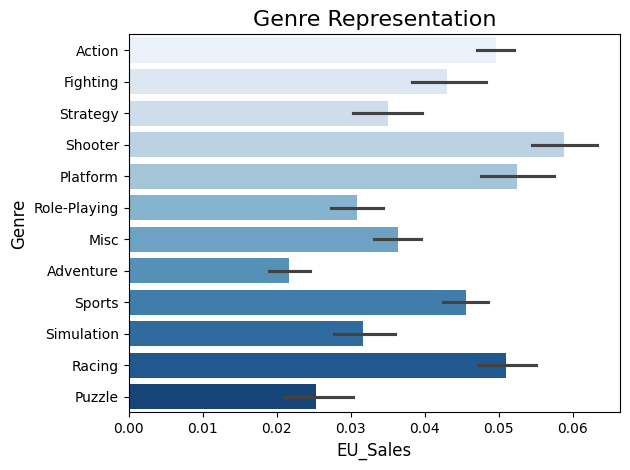

In [187]:
sns.barplot(x="EU_Sales", y="Genre", data=df_cleaned, palette="Blues")  # Use horizontal barplot
plt.title("Genre Representation", fontsize=16)
plt.xlabel("EU_Sales", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

<ipython-input-188-42fff5364877>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="JP_Sales", y="Genre", data=df_cleaned, palette="Blues")  # Use horizontal barplot


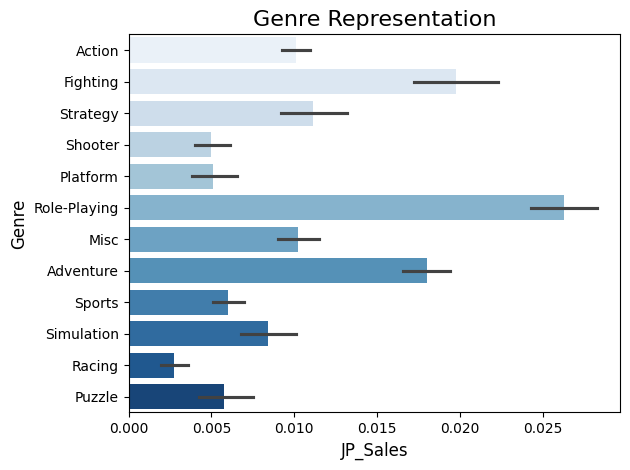

In [188]:
sns.barplot(x="JP_Sales", y="Genre", data=df_cleaned, palette="Blues")  # Use horizontal barplot
plt.title("Genre Representation", fontsize=16)
plt.xlabel("JP_Sales", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

<ipython-input-189-b5973578b88d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Global_Sales", y="Genre", data=df_cleaned, palette="Blues")  # Use horizontal barplot


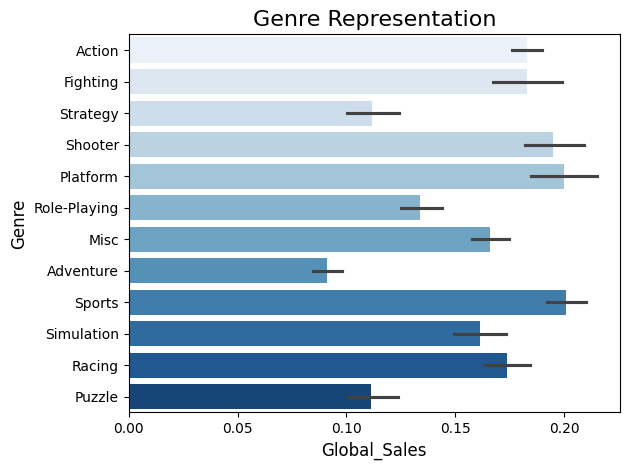

In [189]:
sns.barplot(x="Global_Sales", y="Genre", data=df_cleaned, palette="Blues")  # Use horizontal barplot
plt.title("Genre Representation", fontsize=16)
plt.xlabel("Global_Sales", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

<Axes: xlabel='Year', ylabel='EU_Sales'>

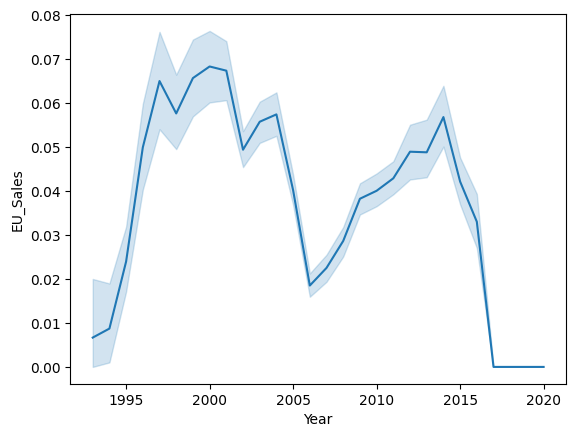

In [195]:
sns.lineplot(x=df_cleaned['Year'],y=df_cleaned['EU_Sales'])

<Axes: xlabel='Year', ylabel='NA_Sales'>

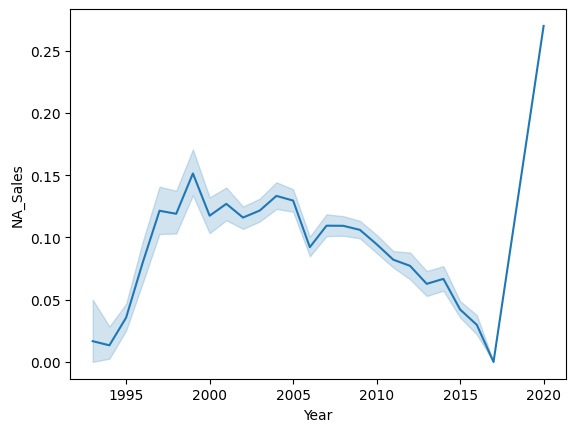

In [196]:
sns.lineplot(x=df_cleaned['Year'],y=df_cleaned['NA_Sales'])

<Axes: xlabel='Year', ylabel='JP_Sales'>

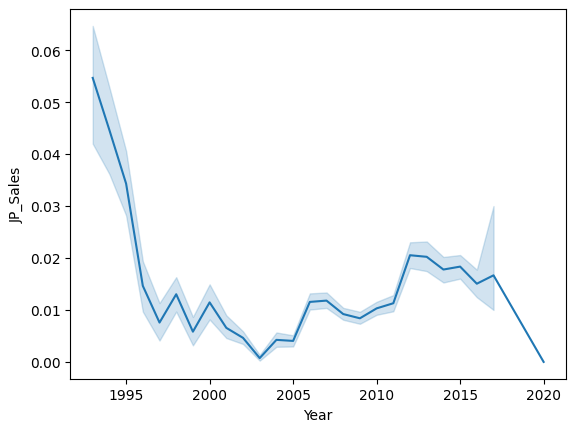

In [197]:
sns.lineplot(x=df_cleaned['Year'],y=df_cleaned['JP_Sales'])

<Axes: xlabel='Year', ylabel='Global_Sales'>

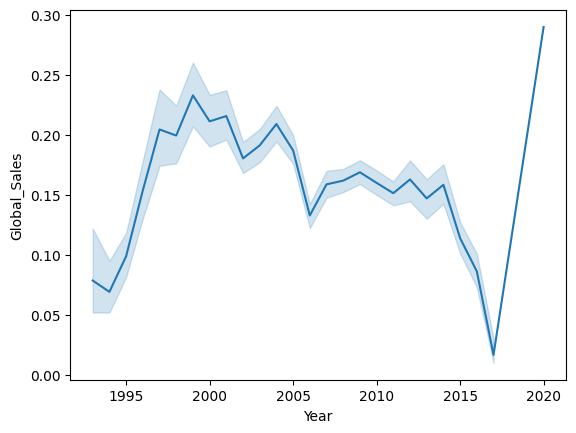

In [198]:
sns.lineplot(x=df_cleaned['Year'],y=df_cleaned['Global_Sales'])

<Axes: >

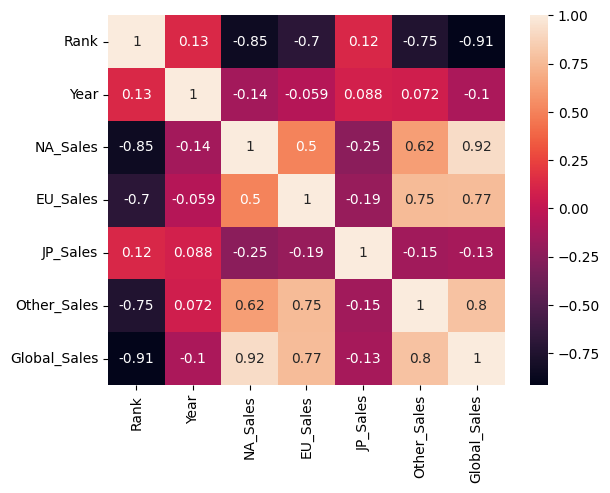

In [202]:

numeric_df = df_cleaned.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(),annot=True)